1. Data Understanding and Exploration
Task 1.1: Load and Explore the Dataset
Verify Dataset Columns and Data Types: Load the dataset and check for data completeness and structure.

Check for Missing Values: Identify and handle any missing values.

Understand the Target Variable (Attrition): Analyze the distribution of the target variable.

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/Attrition.csv")

# Display basic information about the dataset
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Analyze the target variable distribution
print(df['Attrition'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Task 1.2: Perform Univariate and Bivariate Analysis
Visualize Categorical Variables with Attrition: Use bar plots or count plots.

Analyze Numerical Features for Patterns: Use histograms or box plots.

Explore Correlations Using Heatmaps: Visualize correlations between features.

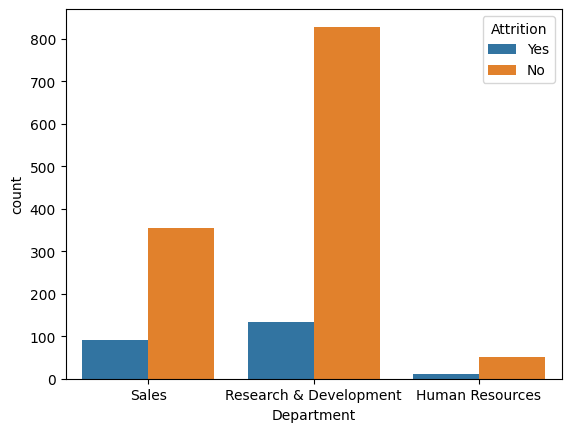

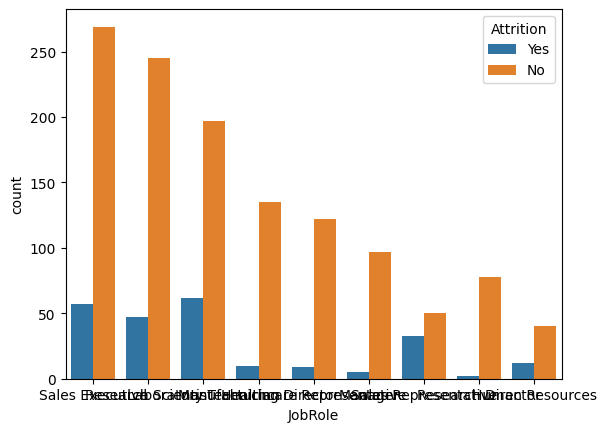

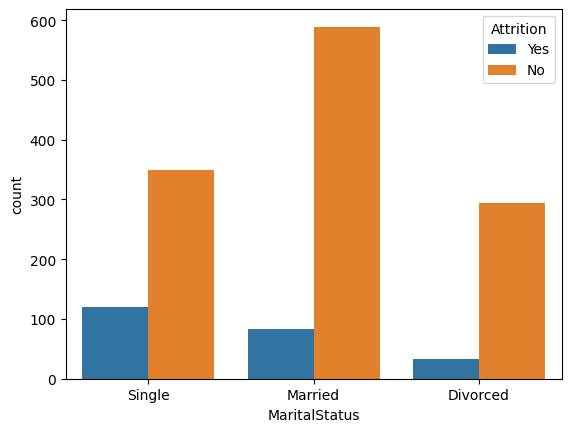

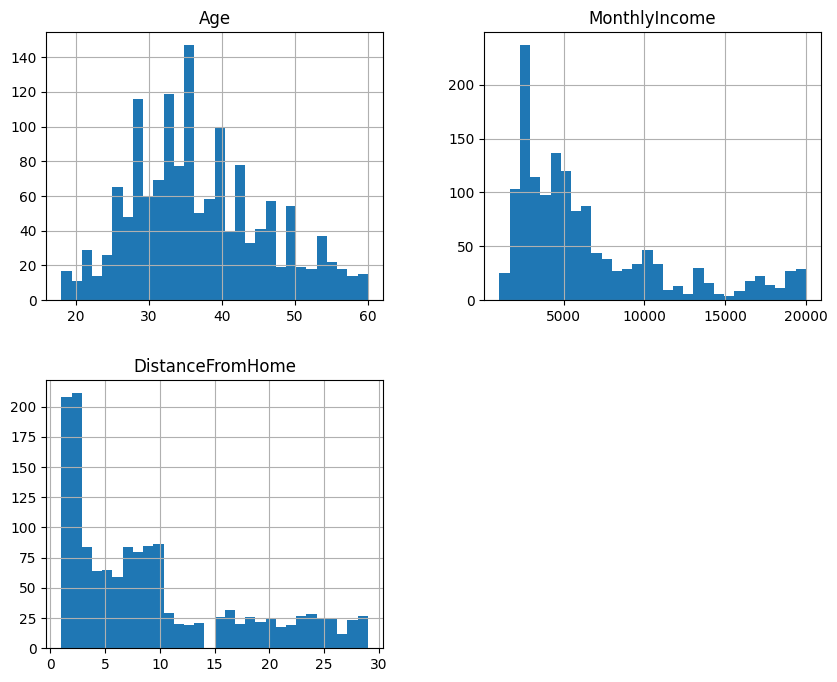

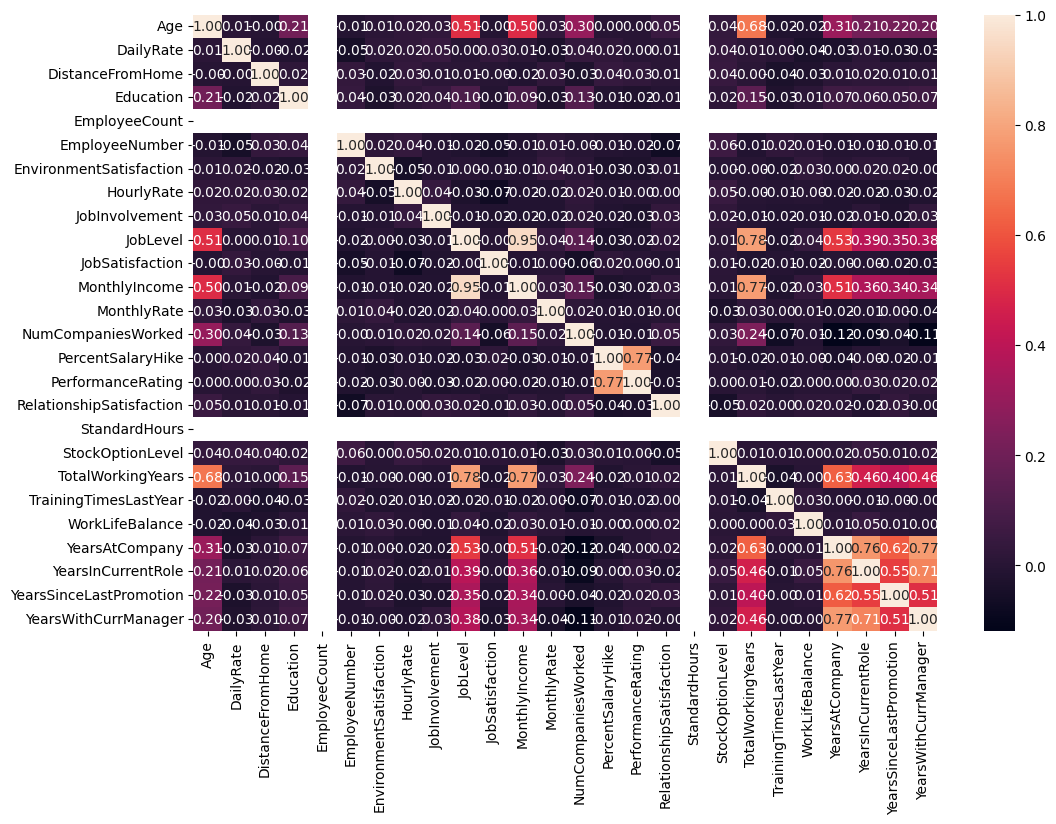

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Visualize categorical variables
categorical_features = ['Department', 'JobRole', 'MaritalStatus']
for feature in categorical_features:
    sns.countplot(data=df, x=feature, hue='Attrition')
    plt.show()

# Visualize numerical features
numerical_features = ['Age', 'MonthlyIncome', 'DistanceFromHome']
df[numerical_features].hist(bins=30, figsize=(10, 8))
plt.show()

# Correlation heatmap
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, fmt=".2f")
plt.show()


2. Data Cleaning and Preprocessing
Task 2.1: Handle Missing Values
Imputation for Numerical Features: Use mean or median imputation.

Imputation for Categorical Features: Use mode or most frequent category imputation.

In [5]:
# Impute missing values for numerical features
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Impute missing values for categorical features
df['Department'].fillna(df['Department'].mode()[0], inplace=True)


<ipython-input-5-ccd2692aed8c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-5-ccd2692aed8c>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

Task 2.2: Encode Categorical Variables
One-Hot Encoding or Label Encoding: Apply appropriate encoding techniques.

In [6]:
# One-Hot Encoding for categorical variables
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)


Task 2.3: Feature Scaling
Scale Numerical Features: Use Min-Max Scaling.

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])


Task 2.4: Address Class Imbalance
Use SMOTE or Class Weighting: Apply techniques to address class imbalance.

In [12]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Select numerical features only
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Create a LabelEncoder object
encoder = LabelEncoder()

# Iterate through all columns in X and encode any object type columns
for column in X.columns:
    if X[column].dtype == object:  # Check if the column is of object type (string)
        X[column] = encoder.fit_transform(X[column])

# Apply SMOTE
sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)


3. Feature Engineering
Task 3.1: Generate New Features
Calculate Tenure Ratios: Create new features based on existing ones.

In [13]:
df['TenureRatio'] = df['YearsAtCompany'] / df['TotalWorkingYears']


Task 3.2: Perform Feature Selection
Use Feature Importance: Apply Random Forest to select important features.

In [14]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X, y)
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
important_features = feature_importances.nlargest(10).index


4. Model Building
Task 4.1: Train Initial Models
Use Different Algorithms: Random Forest, XGBoost.

In [16]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X[important_features], y, test_size=0.2, random_state=42)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Task 4.2: Evaluate Models
Evaluate Models using Cross-Validation: Accuracy, Precision, Recall, F1 Score, ROC-AUC.

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Evaluate Random Forest
rf_preds = le.transform(rf_preds)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print("Random Forest Precision:", precision_score(y_test, rf_preds))
print("Random Forest Recall:", recall_score(y_test, rf_preds))
print("Random Forest F1 Score:", f1_score(y_test, rf_preds))
print("Random Forest ROC-AUC:", roc_auc_score(y_test, rf_preds))

# Evaluate XGBoost
xgb_preds = xgb_model.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, xgb_preds))
print("XGBoost Precision:", precision_score(y_test, xgb_preds))
print("XGBoost Recall:", recall_score(y_test, xgb_preds))
print("XGBoost F1 Score:", f1_score(y_test, xgb_preds))
print("XGBoost ROC-AUC:", roc_auc_score(y_test, xgb_preds))


Random Forest Accuracy: 0.8178137651821862
Random Forest Precision: 0.8155737704918032
Random Forest Recall: 0.8155737704918032
Random Forest F1 Score: 0.8155737704918032
Random Forest ROC-AUC: 0.8177868852459017
XGBoost Accuracy: 0.8441295546558705
XGBoost Precision: 0.8380566801619433
XGBoost Recall: 0.8483606557377049
XGBoost F1 Score: 0.8431771894093686
XGBoost ROC-AUC: 0.8441803278688526


5. Hyperparameter Tuning
Task 5.1: Perform Hyperparameter Optimization
Use Grid Search for Hyperparameter Tuning.

In [19]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print("Best Hyperparameters for RF:", grid_search.best_params_)


Best Hyperparameters for RF: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


6. Model Evaluation and Insights




Task 6.1: Test Model Performance
Test Performance on Hold-Out Dataset.

In [24]:
rf_test_preds = grid_search.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, rf_test_preds))
print("Test ROC-AUC:", roc_auc_score(y_test, rf_test_preds))


Test Accuracy: 0.8157894736842105
Test ROC-AUC: 0.815737704918033


In [26]:
numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

Machine Learning Model Production
Task 1.1: Implement Scalable Preprocessing Pipelines
Use sklearn pipelines or Feature-engine for preprocessing automation.

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', RandomForestClassifier())])

# Preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', RandomForestClassifier())])

# Fit the pipeline
model_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['StockOptionLevel',
                                                   'JobLevel',
                                                   'DistanceFromHome',
                                                   'JobInvolvement',
                                                   'MonthlyIncome',
                                                   'JobSatisfaction', 'Age',
                                                   'EnvironmentSatisfaction']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])])),
                ('classifier', RandomForestClassifier())])

Task 1.2: Create and Validate Train-Test Splits
Ensure Consistent Stratification of Attrition for Balanced Test Sets.

In [28]:
# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
